In [0]:
import pandas as pd
df=pd.read_csv('Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [0]:
df.shape

(9999, 18)

In [0]:
df=df[['Product','Consumer Complaint']]
df=df[pd.notnull(df['Consumer Complaint'])]

In [0]:
df.columns=['Product','Consumer_complaint']   #Removed the space in the Consumer Complaint heading

In [0]:
df['category_id']=df['Product'].factorize()[0]
cat_id_df=df[['Product','category_id']].drop_duplicates().sort_values('category_id')
cat_id_df.head()

,Product,category_id
1,Credit reporting,0
2,Consumer Loan,1
12,Debt collection,2
25,Mortgage,3
36,Credit card,4


In [0]:
cat_to_id=dict(cat_id_df.values)
print(cat_to_id)  #Here i get all the string categories in Integer format

{'Credit reporting': 0, 'Consumer Loan': 1, 'Debt collection': 2, 'Mortgage': 3, 'Credit card': 4, 'Other financial service': 5, 'Bank account or service': 6, 'Student loan': 7, 'Money transfers': 8, 'Payday loan': 9, 'Prepaid card': 10, 'Money transfer, virtual currency, or money service': 11, 'Credit reporting, credit repair services, or other personal consumer reports': 12, 'Checking or savings account': 13, 'Vehicle loan or lease': 14, 'Credit card or prepaid card': 15}


In [0]:
id_to_cat=dict(cat_id_df[['category_id','Product']].values)
print(id_to_cat)

{0: 'Credit reporting', 1: 'Consumer Loan', 2: 'Debt collection', 3: 'Mortgage', 4: 'Credit card', 5: 'Other financial service', 6: 'Bank account or service', 7: 'Student loan', 8: 'Money transfers', 9: 'Payday loan', 10: 'Prepaid card', 11: 'Money transfer, virtual currency, or money service', 12: 'Credit reporting, credit repair services, or other personal consumer reports', 13: 'Checking or savings account', 14: 'Vehicle loan or lease', 15: 'Credit card or prepaid card'}


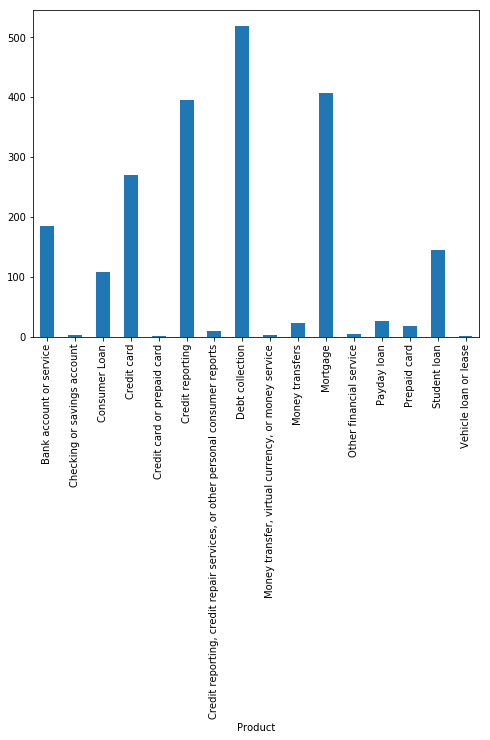

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint.count().plot.bar(ylim=0)
#From the below plot we can see that the dataset is more biased towards credit reporting, debt collection and mortgage. we can do data sampling for this, but we wont

In [0]:
#Now we will convert the text complaint into some feature vector since computer cannot understand english words. The presence of a word would be taken into consideration but the position of the word would be ignored
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,norm='l2',min_df=5,ngram_range=(1,2),stop_words='english')
features=tfidf.fit_transform(df.Consumer_complaint).toarray()
labels=df.category_id
features.shape
#the output denotes that each of the 2114 consumer complaint narratives are represented by 6081 features

(2114, 6081)

In [0]:
#divide data into train-test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.Consumer_complaint,df.Product,random_state=43)

In [0]:
#we need to convert these collection of text documents into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [0]:
#import Support vector machine to build classifier
from sklearn.svm import LinearSVC
clf=LinearSVC().fit(x_train_tfidf,y_train)

In [0]:
print(clf.predict(count_vect.transform([' have outdated information on my credit repor'])))

['Credit reporting']


In [0]:
y_pred=clf.predict(count_vect.transform(x_test))

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred,labels=df.Product,target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.60      0.90      0.72        88
                                                               Consumer Loan       0.41      0.57      0.48        30
                                                             Debt collection       0.60      0.90      0.72        88
                                                                    Mortgage       0.86      0.66      0.75       124
                                                                 Credit card       0.86      0.66      0.75       124
                                                     Other financial service       0.92      0.88      0.90        99
                                                     Bank account or service       0.92      0.88      0.90        99
                                                       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1870: UserWarning: labels size, 2114, does not match size of target_names, 16
  .format(len(labels), len(target_names))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
